<a href="https://colab.research.google.com/github/AMLU-ANNA-JOSHY/Support_Vector_Machines/blob/main/SVM_5_Multi_class_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class problems using SVM


- Multiclass classification aims to classify a new instance to one of the three
classes or more. Eg :Categorize a news article to sports, politics, economics, or
social.
- Although inherently binary classifiers, SVMs can be extended to perform multi-class classification problems.
- Multiclass classification problem is broken down into multiple binary
classification problems.
- **One-to-One Approach** : Find hyperplanes that separate between every two
classes, neglecting the points of the third class.
- This means the separation takes into account only the points of the two classes in
the current split.
- **One-to-Rest Approach** : Find hyperplanes that separate between a class and
all others at once.
- The separation takes all points into account, dividing them into two groups ; a
group for the class points and a group for all other points.

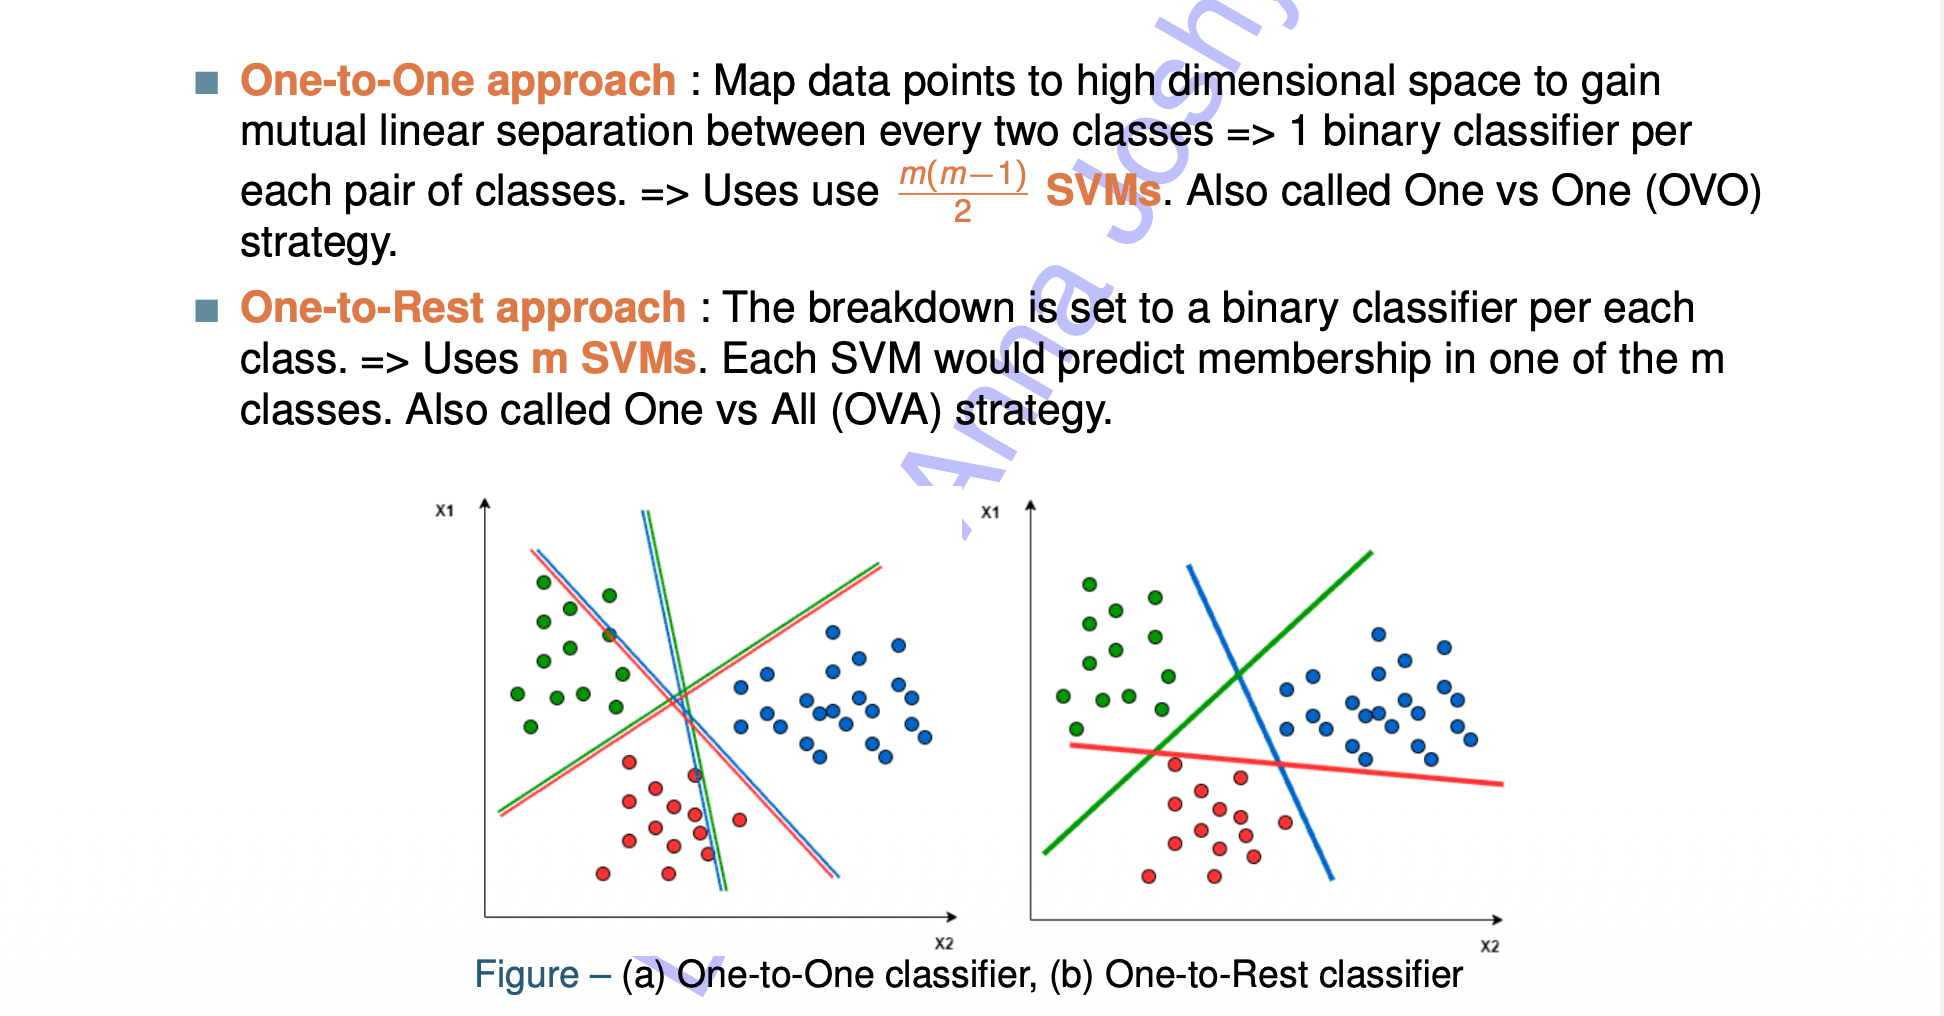

**Challenges in training m SVMs** :
- High Computation : Requires more training points => increased computation.
- Imbalanced Problems : Target class has very fewer datapoints than the rest (all
classes taken together). Eg : MNIST dataset with 10 classes (0 to 9) and 1000
points per class, one SVM takes 1000 examples against 9000.

**Addressing these issues** :
- Randomly select data points from the majority class.
- Employ popular subsampling techniques like SMOTE.

Ref: https ://www.baeldung.com/cs/svm-multiclass-classification

### **Iris Dataset classification**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
iris = load_iris()
X = iris.data          # all 4 features
y = iris.target        # 3 classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Multi-class SVM using One-vs-One approach
svm = SVC(kernel="rbf", decision_function_shape='ovo')
svm.fit(X_train, y_train)

# Testing and evaluation
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


In [ ]:
# Multi-class SVM using One-vs-Rest approach
svm = SVC(kernel="rbf", C = 10, decision_function_shape='ovr')
svm.fit(X_train, y_train)

# Testing and evaluation
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
# Multi-class SVM using One-vs-Rest approach
svm = SVC()
svm.fit(X_train, y_train)

# Testing and evaluation
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

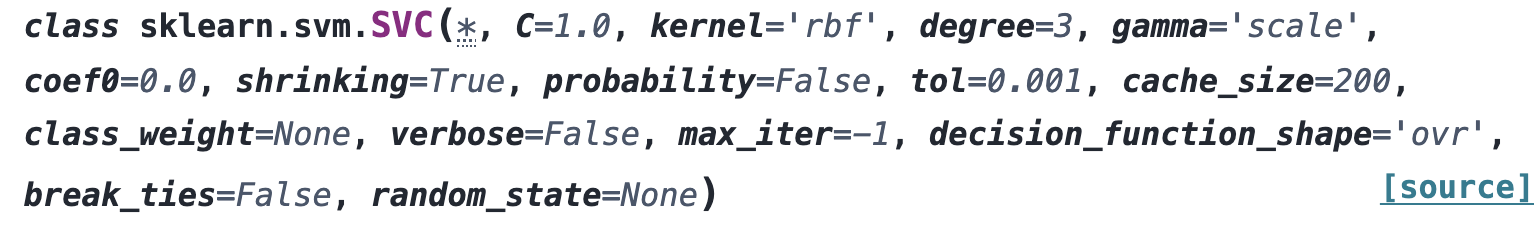

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### **Wine Dataset Classification**

- Number of samples: 178
- Number of features: 13 chemical analysis results
- Number of classes: 3 corresponding to the  region of origin in Italy.

In [ ]:
from sklearn import datasets

# Load the Wine dataset
wine = datasets.load_wine()
wine.target_names

In [ ]:
wine.feature_names

**Implement SVM on this data with 20% test split.**
1) Find which stratergy is the best OVO/OVR.

2) Tune with 3 fold CV to find best C.